In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("covtype.csv")
print(data.shape)  # Expected: (581012, 55)

(581012, 55)


In [3]:
data_sample = data.sample(n=100000, random_state=42)
data_sample.to_csv("covtype_sample.csv", index=False)

In [14]:
columns = data.columns

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
data.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


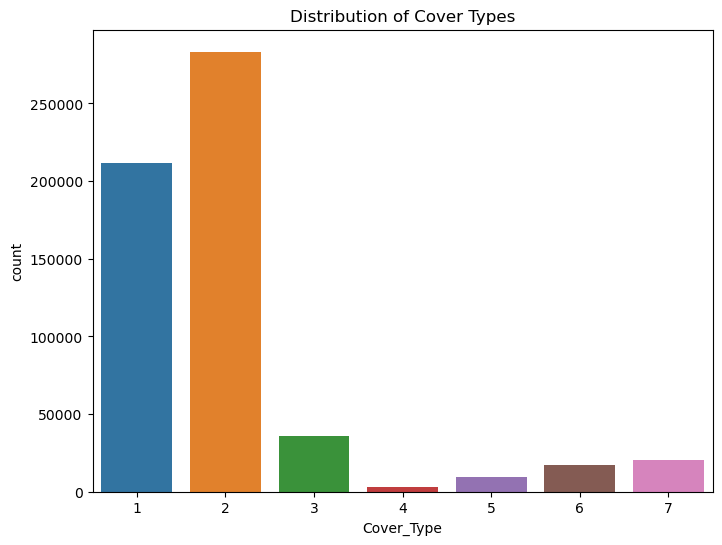

In [9]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=data)
plt.title('Distribution of Cover Types')
plt.savefig('cover_type_distribution.png')
plt.show()

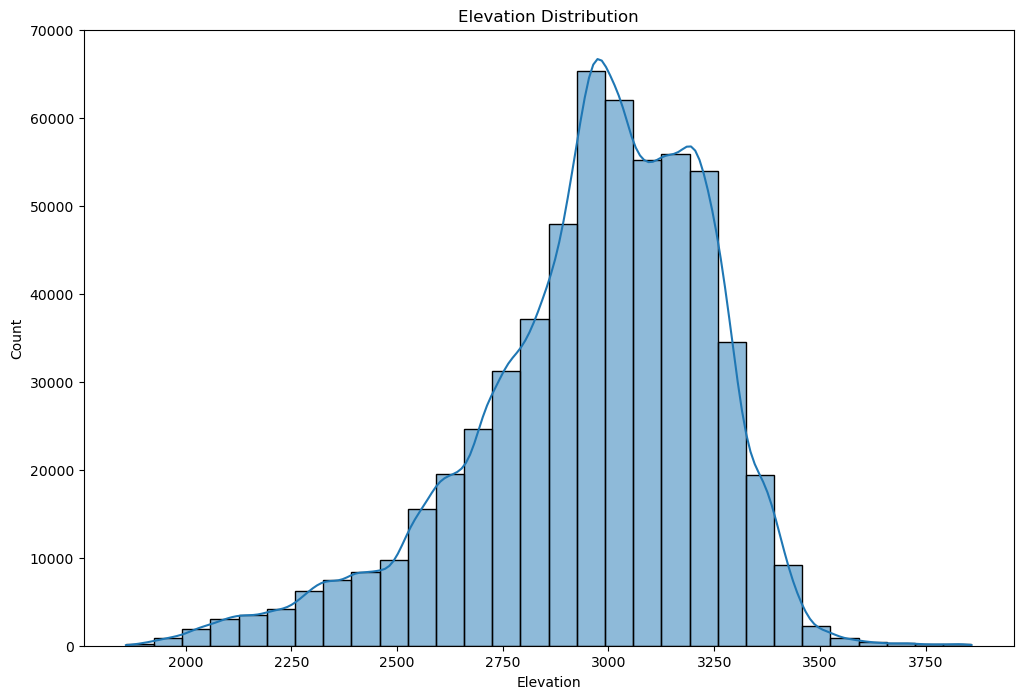

In [11]:
# Numerical feature distributions
plt.figure(figsize=(12, 8))
sns.histplot(data['Elevation'], kde=True, bins=30)
plt.title('Elevation Distribution')
plt.savefig('elevation_distribution.png')
plt.show()

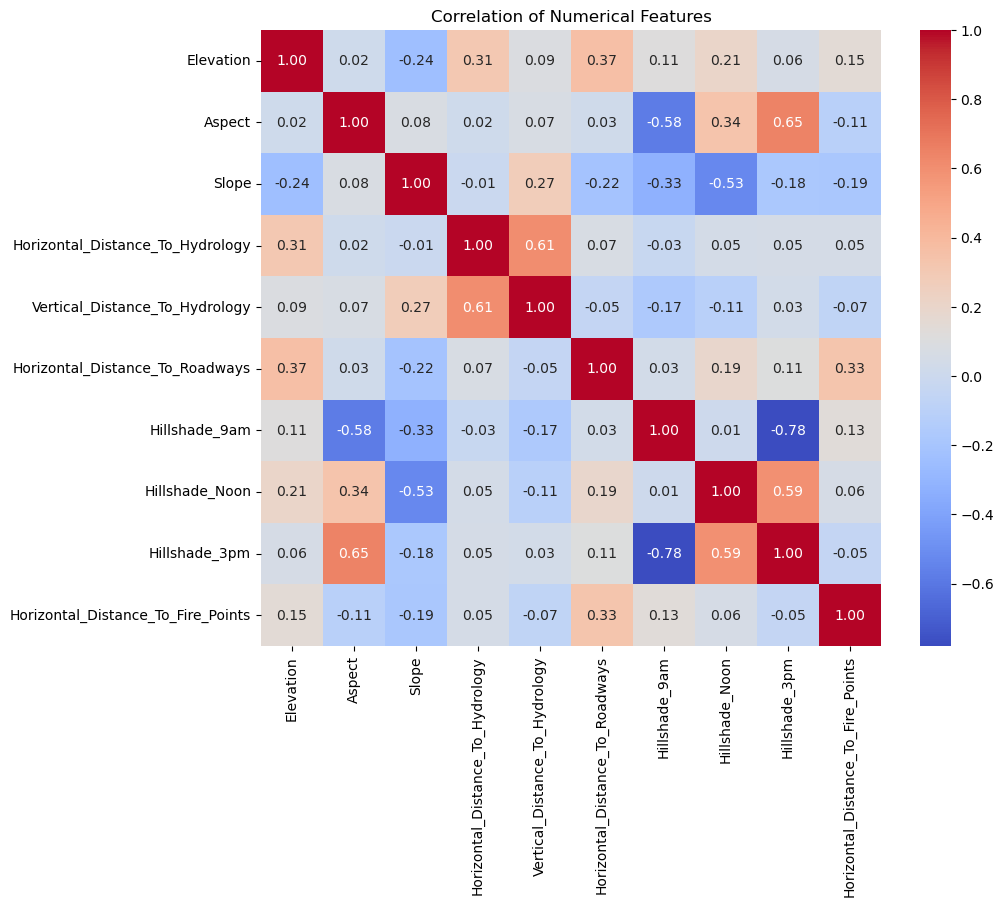

In [15]:
# Correlation heatmap for numerical features
num_features = columns[:10]
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

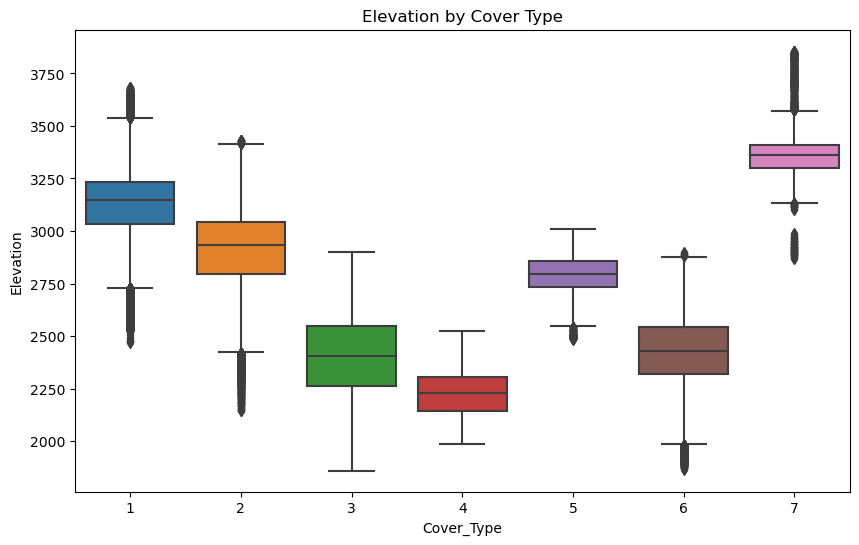

In [17]:
# Feature-target relationship: Elevation by Cover Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=data)
plt.title('Elevation by Cover Type')
plt.savefig('elevation_by_cover_type.png')
plt.show()

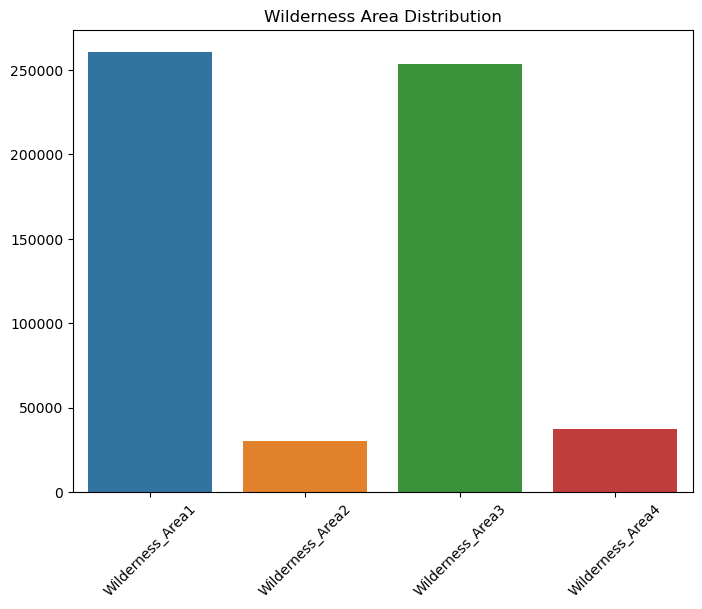

In [19]:
# Wilderness Area distribution
wilderness_cols = [col for col in data.columns if 'Wilderness_Area' in col]
wilderness_counts = data[wilderness_cols].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=wilderness_counts.index, y=wilderness_counts.values)
plt.title('Wilderness Area Distribution')
plt.xticks(rotation=45)
plt.savefig('wilderness_area_distribution.png')
plt.show()

In [21]:
plt.figure(figsize=(10, 6))
pd.crosstab(data['Wilderness_Area_1'], data['Cover_Type']).plot(kind='bar', stacked=True)
plt.title('Cover Type Distribution by Wilderness Area 1')
plt.xlabel('Wilderness_Area_1')
plt.ylabel('Count')
plt.legend(title='Cover Type')
plt.savefig('cover_type_by_wilderness1.png')
plt.show()

KeyError: 'Wilderness_Area_1'

<Figure size 1000x600 with 0 Axes>

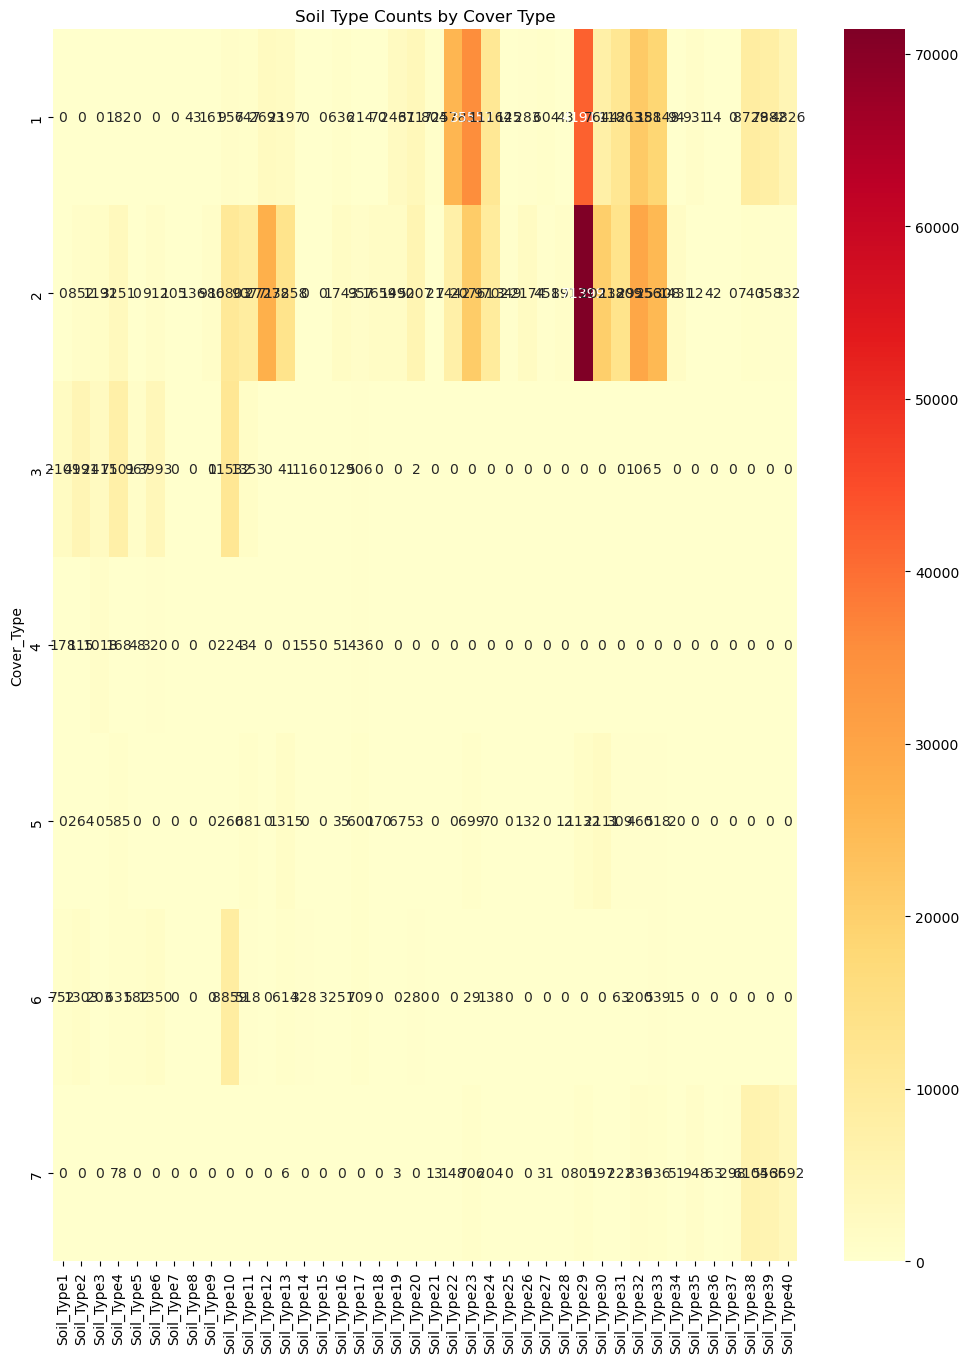

In [23]:
soil_cols = [col for col in data.columns if 'Soil_Type' in col]
soil_cover = data.groupby('Cover_Type')[soil_cols].sum()
plt.figure(figsize=(12, 16))
sns.heatmap(soil_cover, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Soil Type Counts by Cover Type')
plt.savefig('soil_type_by_cover_type.png')
plt.show()

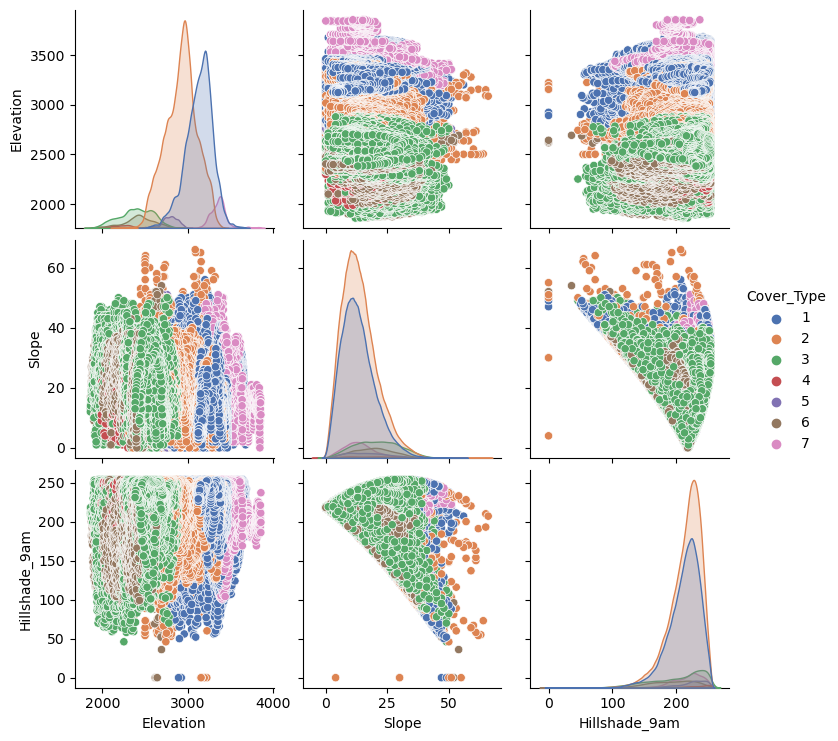

In [25]:
sns.pairplot(data[['Elevation', 'Slope', 'Hillshade_9am', 'Cover_Type']], hue='Cover_Type', palette='deep')
plt.savefig('numerical_pairplot.png')
plt.show()

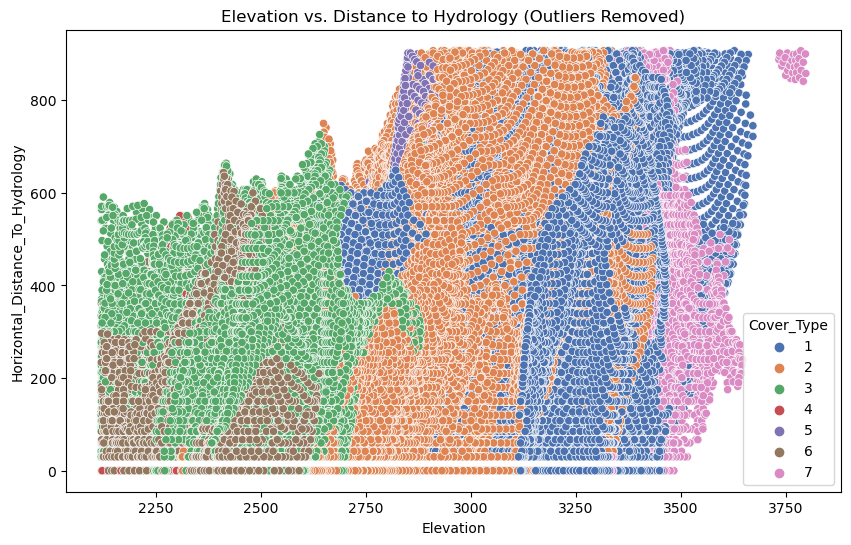

In [27]:
from scipy import stats
plt.figure(figsize=(10, 6))
z_scores = np.abs(stats.zscore(data[['Elevation', 'Horizontal_Distance_To_Hydrology']]))
outliers = (z_scores > 3).any(axis=1)
sns.scatterplot(x='Elevation', y='Horizontal_Distance_To_Hydrology', hue='Cover_Type', data=data[~outliers], palette='deep')
plt.title('Elevation vs. Distance to Hydrology (Outliers Removed)')
plt.savefig('elevation_vs_hydrology_scatter.png')
plt.show()

## Key Insights from Exploratory Data Analysis

### 1. Distribution of Cover Types
- The dataset exhibits a near-balanced distribution with Cover Types 1 and 2 being the most prevalent (200,000 and 250,000 samples respectively), accounting for the majority of the data (35-45% each).
- Cover Type 3 has a moderate presence (~50,000 samples), while Types 4, 5, 6, and 7 are significantly less frequent (<20,000 each), indicating a slight skew toward the dominant classes.
- **Implication**: While the classes are relatively balanced, models should be evaluated with macro-averaged F1-score to ensure fair performance across all cover types, especially the minor ones.

### 2. Wilderness Area Distribution
- Wilderness Areas 1 and 3 dominate with approximately 250,000 samples each, while Areas 2 and 4 are less represented (~50,000 each).
- **Implication**: The uneven distribution of wilderness areas suggests potential regional biases in cover type prevalence, warranting further analysis of their relationship with the target variable.

### 3. Elevation Distribution
- Elevation ranges from ~2000 to ~3750 meters, with a peak concentration around 2750-3000 meters (~60,000 samples), showing a right-skewed distribution with a long tail toward higher elevations.
- **Implication**: The variability in elevation is significant and likely a key predictor, with most observations occurring at mid-to-lower elevations, which may correlate with specific cover types.

### 4. Elevation by Cover Type
- Cover Types 1 and 2 exhibit higher median elevations (~3000-3250 meters) with wider interquartile ranges, indicating greater variability.
- Cover Type 7 has the highest median elevation (~3400 meters), while Types 4 and 5 are lower (~2500-2750 meters), showing clear elevation-based separation.
- Outliers are present, particularly for Types 1 and 2, suggesting potential noise or unique ecological conditions.
- **Implication**: Elevation is a strong discriminative feature, with distinct elevation zones for different cover types, supporting its use as a primary predictor in modeling.

### 5. Correlation of Numerical Features
- Moderate correlations exist among numerical features (e.g., Hillshade_9am and Hillshade_3pm: -0.78, Elevation and Horizontal_Distance_To_Roadways: 0.37), but no extreme multicollinearity (>0.9) is observed.
- Negative correlations (e.g., Slope with Hillshade_9am: -0.33) reflect terrain-related trade-offs.
- **Implication**: Numerical features can be used together without significant redundancy, though feature selection or scaling may optimize model performance.

### 6. Soil Type Counts by Cover Type
- Certain soil types (e.g., Soil_Type_10, Soil_Type_23) show higher counts across multiple cover types, with peaks exceeding 60,000 samples, while many soil types have minimal representation (<10,000).
- **Implication**: Soil types may act as important categorical predictors, with a subset likely driving cover type differentiation, suggesting potential feature reduction or engineering.

### 7. Pair Plot of Numerical Features
- The pair plot reveals distinct clusters and overlaps in the distribution of Elevation, Slope, and Hillshade_9am across cover types, with some separation (e.g., higher elevations for Type 7).
- **Implication**: Pairwise relationships indicate that combining these features may enhance model discrimination, though overlap suggests the need for advanced classification techniques.

### 8. Elevation vs. Distance to Hydrology (Outliers Removed)
- Clear separation by cover type is observed, with Type 7 at higher elevations and greater distances, while Types 1 and 2 dominate mid-range elevations and distances.
- Outlier removal highlights cleaner clusters, reducing noise.
- **Implication**: Elevation and distance to hydrology together provide strong predictive power, and outlier handling may improve model robustness.

### Overall Takeaways
- The dataset is suitable for multiclass classification, with Elevation, wilderness areas, and select soil types emerging as key predictors.
- The near-balanced class distribution supports accuracy as a primary metric, supplemented by macro F1-score for minor classes.
- Preprocessing steps (e.g., scaling numerical features, handling outliers) and feature engineering (e.g., reducing soil type dimensions) will be crucial for optimal model performance.
- These insights will guide the selection and tuning of models (e.g., Random Forest, XGBoost) in the next phase.